In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
healthy_bellpepper_df = os.listdir('/content/drive/MyDrive/Colab Notebooks/datasets/PlantVillage/Pepper__bell___healthy')
print(healthy_bellpepper_df[0:5])
print(healthy_bellpepper_df[-5:])

['1d6e01ff-affd-4867-895d-fb82b6b0dce3___JR_HL 7952.JPG', '0dd09705-5593-4d01-9a9b-c1d5857daf92___JR_HL 8212.JPG', '6af0dc26-87c3-4eef-be98-8c6741a8f94d___JR_HL 8735.JPG', '3be55250-5873-46f7-a55c-e16ec36a300d___JR_HL 8773.JPG', '49fe17e3-29c6-4619-9312-290858cb78be___JR_HL 7598.JPG']
['25f0c780-fe79-473f-914a-d7201eb2a3c1___JR_HL 8512.JPG', '6bd5ef2c-da52-4962-b933-528eaa9afa6c___JR_HL 7757.JPG', '0cc984a1-ea7d-4f97-9967-5ca1be71c932___JR_HL 8803.JPG', '1be321d5-d2cc-4945-b2f3-a36c41160838___JR_HL 7596.JPG', '2d117ef0-5705-4814-b191-1d184204452f___JR_HL 7744.JPG']


In [ ]:
unhealthy_bellpepper_df = os.listdir('/content/drive/MyDrive/Colab Notebooks/datasets/PlantVillage/Pepper__bell___Bacterial_spot')
print(unhealthy_bellpepper_df[0:5])
print(unhealthy_bellpepper_df[-5:])

['0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG', '02baf62e-11e2-4dde-97fb-e369b57d55d3___JR_B.Spot 8971.JPG', '080b107a-192f-40ce-8942-d8ccca8dfc52___NREC_B.Spot 1872.JPG', '00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG', '0169b9ac-07b9-4be1-8b85-da94481f05a4___NREC_B.Spot 9169.JPG']
['fd733c73-855b-49df-87cd-628bcd5e87a7___NREC_B.Spot 9240.JPG', 'ffa3b1df-49c6-4fd2-9ec5-1ca5eb175797___JR_B.Spot 3254.JPG', 'fe0f9f93-fb79-45fa-a195-6b85141ad2aa___NREC_B.Spot 9227.JPG', 'ff7d08df-7fca-4a2e-a2f4-b196a19e6442___JR_B.Spot 3237.JPG', 'fd674a82-dd98-419b-998c-48e43bfcbf1f___NREC_B.Spot 1900.JPG']


In [ ]:
print('Number of healthy Bell Pepper : ', len(healthy_bellpepper_df))
print('Number of unhealthy Bell Pepper : ', len(unhealthy_bellpepper_df))

Number of healthy Bell Pepper :  1478
Number of unhealthy Bell Pepper :  997


##LABEL CREATION

In [ ]:
healthy_bellpepper_labels = [1]*1478
unhealthy_bellpepper_labels = [0]*997

In [ ]:
print(healthy_bellpepper_labels[0:5])
print(unhealthy_bellpepper_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(healthy_bellpepper_labels))
print(len(unhealthy_bellpepper_labels))

1478
997


In [ ]:
labels = healthy_bellpepper_labels + unhealthy_bellpepper_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

2475
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


#HEALTHY BELL PEPPER

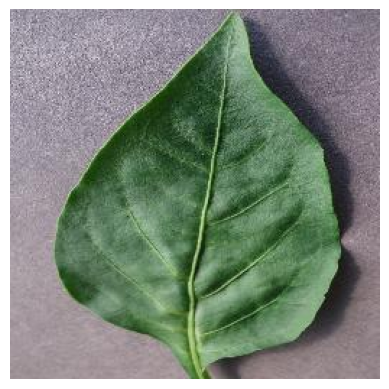

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/datasets/PlantVillage/Pepper__bell___healthy/002f87b7-e1a5-49e5-a422-bb423630ded5___JR_HL 8068.JPG')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

#UNHEALTHY BELL PEPPER

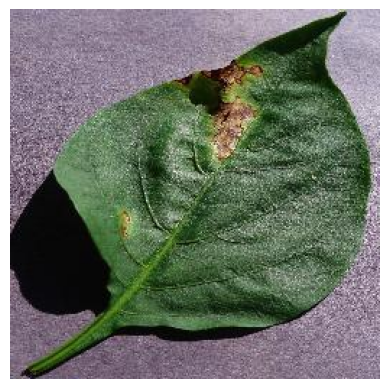

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/datasets/PlantVillage/Pepper__bell___Bacterial_spot/006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3395.JPG')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

#Resizing images and Converting to Numpy Array

In [ ]:
healthy_bellpepper_path = '/content/drive/MyDrive/Colab Notebooks/datasets/PlantVillage/Pepper__bell___healthy/'

data = []

for img_file in healthy_bellpepper_df:
  image = Image.open(healthy_bellpepper_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

unhealthy_bellpepper_path = '/content/drive/MyDrive/Colab Notebooks/datasets/PlantVillage/Pepper__bell___Bacterial_spot/'

for img_file in unhealthy_bellpepper_df:
  image = Image.open(unhealthy_bellpepper_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

2475

In [ ]:
data[0]

array([[[150, 136, 136],
        [159, 145, 145],
        [153, 139, 139],
        ...,
        [164, 154, 155],
        [163, 153, 154],
        [164, 154, 155]],

       [[158, 144, 144],
        [159, 145, 145],
        [154, 140, 140],
        ...,
        [156, 146, 147],
        [160, 150, 151],
        [162, 152, 153]],

       [[160, 146, 146],
        [151, 137, 137],
        [157, 143, 143],
        ...,
        [153, 143, 144],
        [158, 148, 149],
        [160, 150, 151]],

       ...,

       [[149, 143, 155],
        [153, 147, 159],
        [149, 143, 155],
        ...,
        [155, 150, 157],
        [158, 153, 160],
        [180, 175, 182]],

       [[144, 138, 150],
        [145, 139, 151],
        [148, 142, 154],
        ...,
        [153, 148, 155],
        [157, 152, 159],
        [154, 149, 156]],

       [[149, 143, 155],
        [143, 137, 149],
        [148, 142, 154],
        ...,
        [151, 146, 153],
        [164, 159, 166],
        [164, 159, 166]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

#Converting Image and Label list into numpy array

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(2475, 128, 128, 3)
(2475,)


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=10)

In [ ]:
print(X.shape, xtrain.shape, xtest.shape)

(2475, 128, 128, 3) (1980, 128, 128, 3) (495, 128, 128, 3)


In [ ]:
xtrain_scaled = xtrain/255
ytrain_scaled = ytrain/255

In [ ]:
xtrain[0]

array([[[174, 163, 171],
        [170, 159, 167],
        [165, 154, 162],
        ...,
        [166, 153, 160],
        [162, 149, 156],
        [161, 148, 155]],

       [[172, 161, 169],
        [172, 161, 169],
        [167, 156, 164],
        ...,
        [160, 147, 154],
        [164, 151, 158],
        [160, 147, 154]],

       [[164, 153, 161],
        [164, 153, 161],
        [167, 156, 164],
        ...,
        [164, 151, 158],
        [164, 151, 158],
        [167, 154, 161]],

       ...,

       [[120, 101, 103],
        [125, 106, 108],
        [126, 107, 109],
        ...,
        [148, 127, 122],
        [142, 121, 116],
        [145, 124, 119]],

       [[113,  94,  96],
        [117,  98, 100],
        [121, 102, 104],
        ...,
        [150, 129, 124],
        [144, 123, 118],
        [145, 124, 119]],

       [[112,  93,  95],
        [116,  97,  99],
        [126, 107, 109],
        ...,
        [154, 133, 128],
        [155, 134, 129],
        [150, 129, 124]]

In [ ]:
xtrain_scaled[0]

array([[[0.68235294, 0.63921569, 0.67058824],
        [0.66666667, 0.62352941, 0.65490196],
        [0.64705882, 0.60392157, 0.63529412],
        ...,
        [0.65098039, 0.6       , 0.62745098],
        [0.63529412, 0.58431373, 0.61176471],
        [0.63137255, 0.58039216, 0.60784314]],

       [[0.6745098 , 0.63137255, 0.6627451 ],
        [0.6745098 , 0.63137255, 0.6627451 ],
        [0.65490196, 0.61176471, 0.64313725],
        ...,
        [0.62745098, 0.57647059, 0.60392157],
        [0.64313725, 0.59215686, 0.61960784],
        [0.62745098, 0.57647059, 0.60392157]],

       [[0.64313725, 0.6       , 0.63137255],
        [0.64313725, 0.6       , 0.63137255],
        [0.65490196, 0.61176471, 0.64313725],
        ...,
        [0.64313725, 0.59215686, 0.61960784],
        [0.64313725, 0.59215686, 0.61960784],
        [0.65490196, 0.60392157, 0.63137255]],

       ...,

       [[0.47058824, 0.39607843, 0.40392157],
        [0.49019608, 0.41568627, 0.42352941],
        [0.49411765, 0

MODEL BUILDING

In [ ]:
#BUILDING CNN MODEL

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dropout, Dense, Activation

num_of_classes = 2

model = Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
training = model.fit(xtrain_scaled, ytrain, validation_split=0.1, epochs=20)

Epoch 1/20
56/56 [==============================] - 56s 970ms/step - loss: 0.5340 - accuracy: 0.7368 - val_loss: 0.3448 - val_accuracy: 0.8737
Epoch 2/20
56/56 [==============================] - 56s 982ms/step - loss: 0.3040 - accuracy: 0.8883 - val_loss: 0.2334 - val_accuracy: 0.9040
Epoch 3/20
56/56 [==============================] - 56s 1s/step - loss: 0.1921 - accuracy: 0.9338 - val_loss: 0.1084 - val_accuracy: 0.9646
Epoch 4/20
56/56 [==============================] - 54s 963ms/step - loss: 0.1473 - accuracy: 0.9501 - val_loss: 0.0670 - val_accuracy: 0.9747
Epoch 5/20
56/56 [==============================] - 55s 963ms/step - loss: 0.1333 - accuracy: 0.9523 - val_loss: 0.0448 - val_accuracy: 0.9848
Epoch 6/20
56/56 [==============================] - 56s 1s/step - loss: 0.1180 - accuracy: 0.9624 - val_loss: 0.0395 - val_accuracy: 0.9798
Epoch 7/20
56/56 [==============================] - 55s 992ms/step - loss: 0.0670 - accuracy: 0.9759 - val_loss: 0.0416 - val_accuracy: 0.9899
Epoch

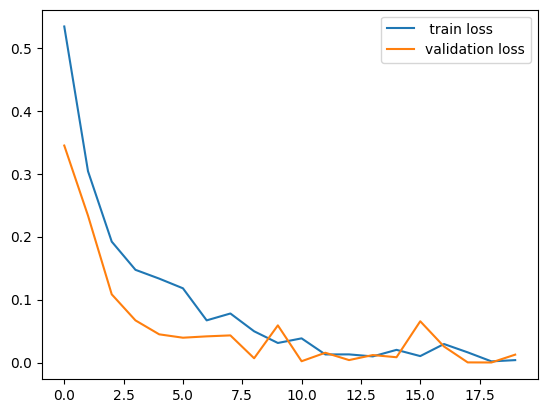

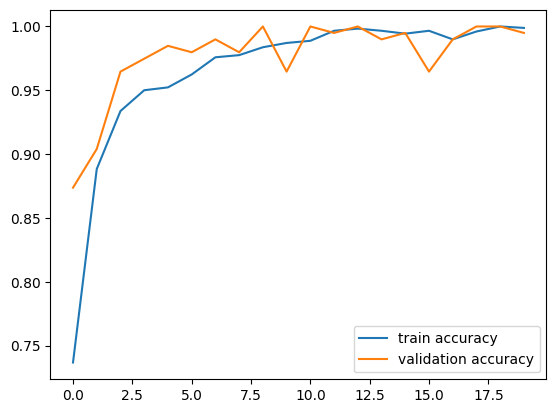

In [ ]:
h = training

plt.plot(h.history['loss'], label=' train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/drive/MyDrive/Colab Notebooks/datasets/PlantVillage/Pepper__bell___Bacterial_spot/01ebc916-4793-40a3-b5e4-a32687e4fa3d___NREC_B.Spot 9125.JPG


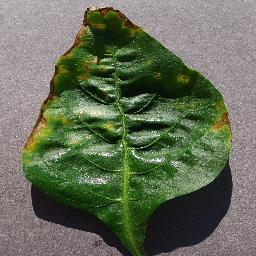

1/1 [==============================] - 0s 169ms/step
[[0.9168776  0.09999821]]
0
The bell pepper unhealthy


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The bell pepper is healthy')

elif input_pred_label == 0:

  print('The bell pepper unhealthy')



Path of the image to be predicted: /content/drive/MyDrive/Colab Notebooks/datasets/PlantVillage/Pepper__bell___healthy/016c8a9f-8eab-41b2-bb4b-0eb6ed0b2a7d___JR_HL 8591.JPG


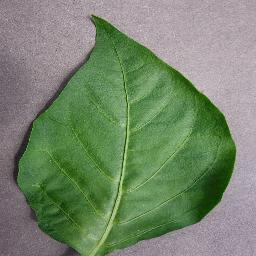

1/1 [==============================] - 0s 32ms/step
[[2.1182536e-04 9.9962538e-01]]
1
The bell pepper is healthy


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The bell pepper is healthy')

elif input_pred_label == 0:

  print('The bell pepper unhealthy')